In [1]:
from netCDF4 import Dataset

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
fileName = '../../ETOPO1_Ice_c_gmt4.grd'

fh = Dataset(fileName, mode='r')

fh.variables.keys()

x = fh.variables['x']
y = fh.variables['y']
z = fh.variables['z']

In [3]:
x

<class 'netCDF4._netCDF4.Variable'>
float64 x(x)
    long_name: Longitude
    actual_range: [-180.  180.]
    units: degrees_east
unlimited dimensions: 
current shape = (21600,)
filling off

In [4]:
y

<class 'netCDF4._netCDF4.Variable'>
float64 y(y)
    long_name: Latitude
    actual_range: [-90.  90.]
    units: degrees_north
unlimited dimensions: 
current shape = (10800,)
filling off

In [5]:
z

<class 'netCDF4._netCDF4.Variable'>
int32 z(y, x)
    long_name: z
    _FillValue: -2147483648
    actual_range: [-10803.   8333.]
unlimited dimensions: 
current shape = (10800, 21600)
filling off

In [6]:
dx = np.diff(x[:])[0]
dy = np.diff(y[:])[0]
print('dx={}, dy={}'.format(dx,dy))

dx=0.01666666666667993, dy=0.01666666666666572


I want the rectangle $ (lon,lat) \in [-240,-120] \times [-60, 60] $, but can only use  $lon \in[-180,180]$, hence have to use the joined set: $$lon \in [120,180] \cup [-180,-120]$$

# Cut in x direction

It consists in two segments for $lon \in [0,180]$ and $lon \in [-180,0]$ but translated to $[180,360]$

## First segment

In [7]:
x0 = 0
x1 = 180
i0 = int((x0+180)*60)
i1 = int((x1+180)*60)
print(i0,np.argmin(np.abs(x0-x[:])))
print(i1,np.argmin(np.abs(x1-x[:])))

10800 10800
21600 21599


In [8]:
x[:].min(),x[:].max()

(-179.99166666666667, 179.99166666666667)

## Second segment

In [9]:
x2 = 290-360
i2 = int((x2+180)*60)
print(i2,np.argmin(np.abs(x2-x[:])))
print(x[i2]+360)

6600 6600
290.0083333333333


Cut in y direction

In [10]:
y0 = -70
y1 = 70
j0 = int((y0+90)*60)
j1 = int((y1+90)*60)
print(j0, np.argmin(np.abs(y0-y[:])))
print(j1, np.argmin(np.abs(y1-y[:])))

1200 1199
9600 9600


Select bathymetry from range and skip some values

In [11]:
j0,j1,i0,i1,i2

(1200, 9600, 10800, 21600, 6600)

k = 10
zfirst = z[j0:(j1+1):k,i0:(i1+1):k]
zsecond = z[j0:(j1+1):k,:(i2+1):k]
zfinal = np.hstack([zfirst,zsecond])
# zfinal = z[j0:(j1+1),i0:(i1+1)][::2,::2]

In [19]:
zfinal = z[j0:j1:10,::10]

zfinal.shape

(840, 2160)

(0.0, 216.0, 0.0, 84.0)

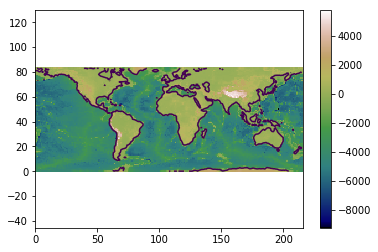

In [14]:
plt.pcolormesh(zfinal[::10,::10],cmap=plt.cm.gist_earth)
plt.colorbar()
plt.contour(zfinal[::10,::10],[0.0])
plt.axis('equal')

np.savetxt('bathymetry',-zfinal[::1,::1])

In [15]:
arr = np.hstack([zfinal.shape[0],zfinal.shape[1],(-zfinal).ravel()])

In [16]:
arr.astype('float64').tofile('bathymetry')
